In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
real_data_model =pickle.load(open("../models/real_test_train.sav", 'rb'))
synth_data_model =pickle.load(open("../models/gen_test_train.sav", 'rb'))

# y_load_predit=load_lr_model.predict(X_test)

In [7]:
real_df = pd.read_csv('../data/long_individual_merged.csv')
synth_df = pd.read_csv('../data/generated_data.csv')

In [9]:
print(real_df.shape)
print(synth_df.shape)

(587543, 21)
(587543, 21)


In [10]:
def split_data(df):
    y = df.iloc[:,4].values
    X = df.drop('eptime', axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    return X_train, X_test, y_train, y_test

In [32]:
synth_df.head()

,DVAge,NumChild,NumAdult,dia_wt_a,eptime,DMSex_count,WorkSta_count,Income_count,Sector_count,DMFlag_count,...,ddayw_count,WhereStart_count,WhereEnd_count,RushedD_count,KindOfDay_count,Trip_count,tid_count,Device_count,WhereWhen_count,whatdoing_count
0,51,1,1,1.808954,40.0,263242,156974,44350,224284,467138,...,299788,423992,536135,423773,140059,489350,3039,171140,255442,28606
1,44,2,4,0.759111,90.0,339140,142418,85105,242092,180436,...,180248,530153,536135,330333,185982,314342,5766,463457,397040,34809
2,42,2,3,0.972058,70.0,267996,200664,66821,104980,258492,...,272882,312281,456453,225589,166784,452475,2268,461687,110224,21429
3,77,0,1,0.819875,110.0,292769,161922,16397,208537,467138,...,220478,543584,536135,446963,146572,489350,9741,444623,397040,52706
4,47,0,3,1.502018,10.0,248403,97341,1208,182658,467138,...,210087,543584,536135,446963,158993,489350,2001,414288,147689,4386


In [33]:
real_df.head()

,DVAge,NumChild,NumAdult,dia_wt_a,eptime,DMSex_count,WorkSta_count,Income_count,Sector_count,DMFlag_count,...,ddayw_count,WhereStart_count,WhereEnd_count,RushedD_count,KindOfDay_count,Trip_count,tid_count,Device_count,WhereWhen_count,whatdoing_count
0,48,1,3,2.021182,110.0,339140,245628,36312,140226,64345,...,299788,543584,536135,446963,193731,489350,16531,463457,397040,55365
1,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,...,299788,543584,536135,446963,193731,489350,1068,463457,397040,3176
2,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,...,299788,543584,536135,446963,193731,489350,2315,463457,397040,52985
3,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,...,299788,543584,536135,446963,193731,489350,1892,463457,397040,11621
4,48,1,3,2.021182,10.0,339140,245628,36312,140226,64345,...,299788,543584,536135,446963,193731,489350,1925,86533,397040,30958


In [11]:
real_X_train, real_X_test, real_y_train, real_y_test = split_data(real_df)
synth_X_train, synth_X_test, synth_y_train, synth_y_test = split_data(synth_df)

In [30]:
sns.set(rc={"figure.figsize":(20, 8)}) #width=3, #height=4

<AxesSubplot:>

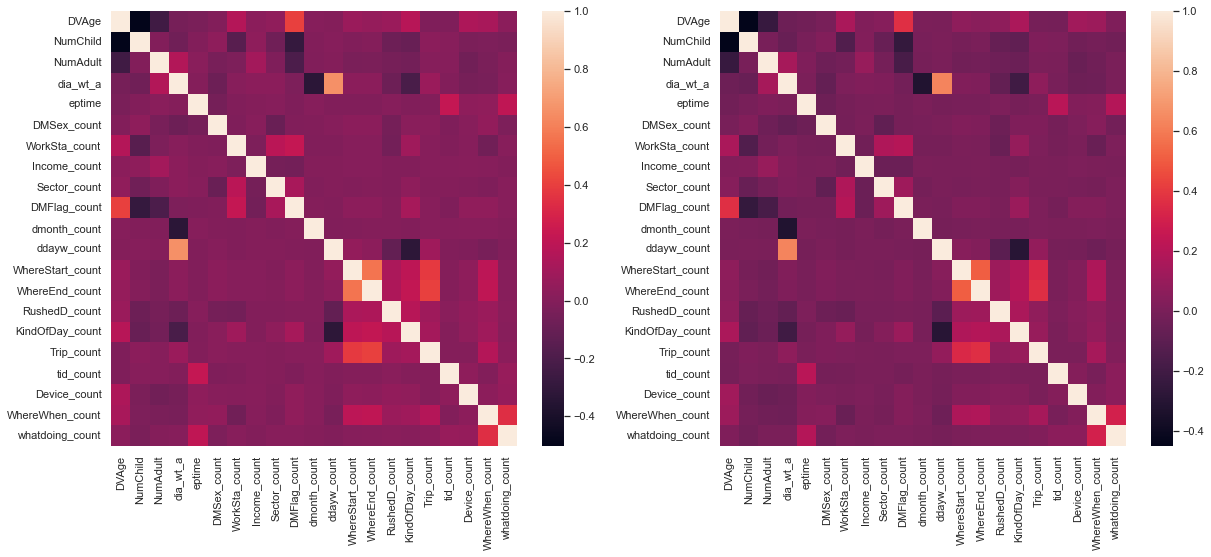

In [31]:
fig, axs = plt.subplots(ncols=2)
sns.heatmap(real_df.corr(), ax=axs[0])
sns.heatmap(synth_df.corr(), ax=axs[1])

In [17]:
def prediction(X_test, y_test):
    X_test = normalize(X_test, norm='l2')
    prediction = real_data_model.predict(X_test)
    mse = mean_squared_error(y_test, prediction)
    mae = mean_absolute_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    rmse = mse**.5

    print(f'Mean Sq Error: {mse}')
    print(f'Root Mean Sq Error: {rmse}')
    print(f'Mean Abs Error: {mae}')
    print(f'R-square: {r2}')

In [18]:
prediction(real_X_test, real_y_test)

Mean Sq Error: 2493.599332092302
Root Mean Sq Error: 49.93595229984407
Mean Abs Error: 27.455288614801233
R-square: 0.3727213039897116


In [19]:
prediction(synth_X_test, synth_y_test)

Mean Sq Error: 5766.281439001783
Root Mean Sq Error: 75.93603518094544
Mean Abs Error: 52.95416619389002
R-square: -1.6279840606129548
